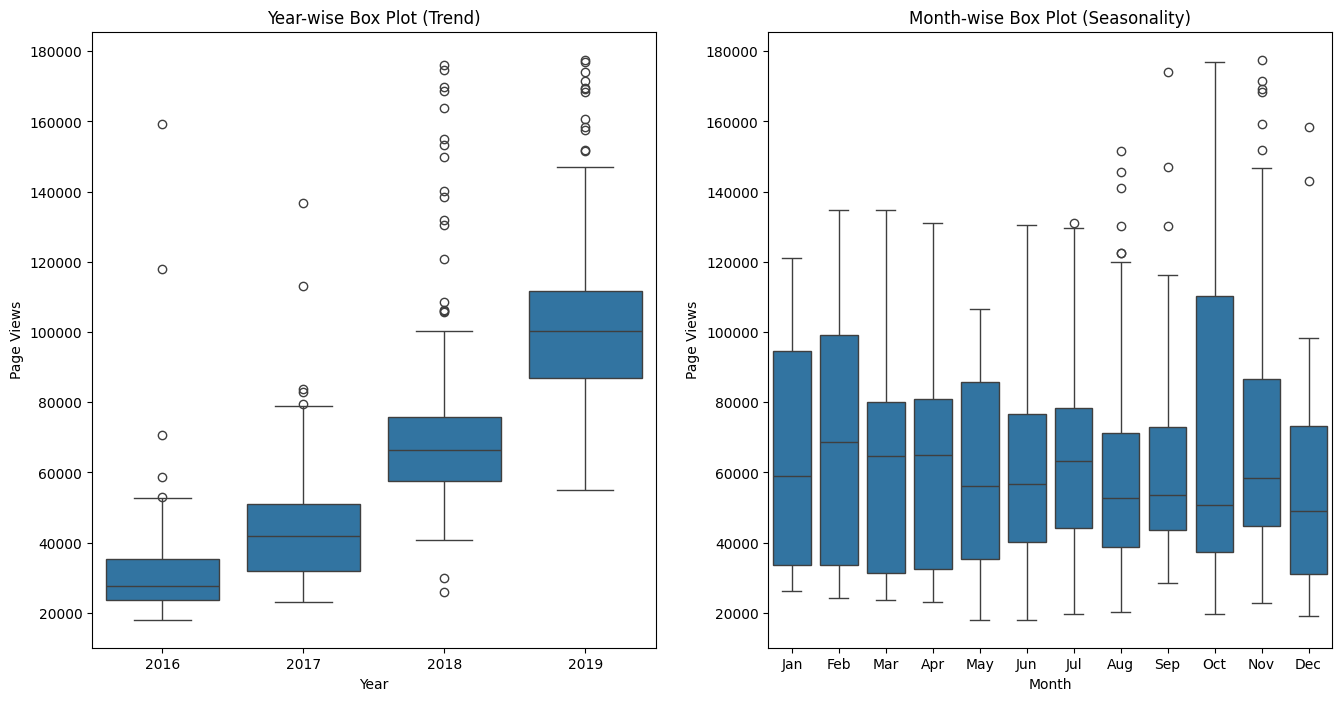

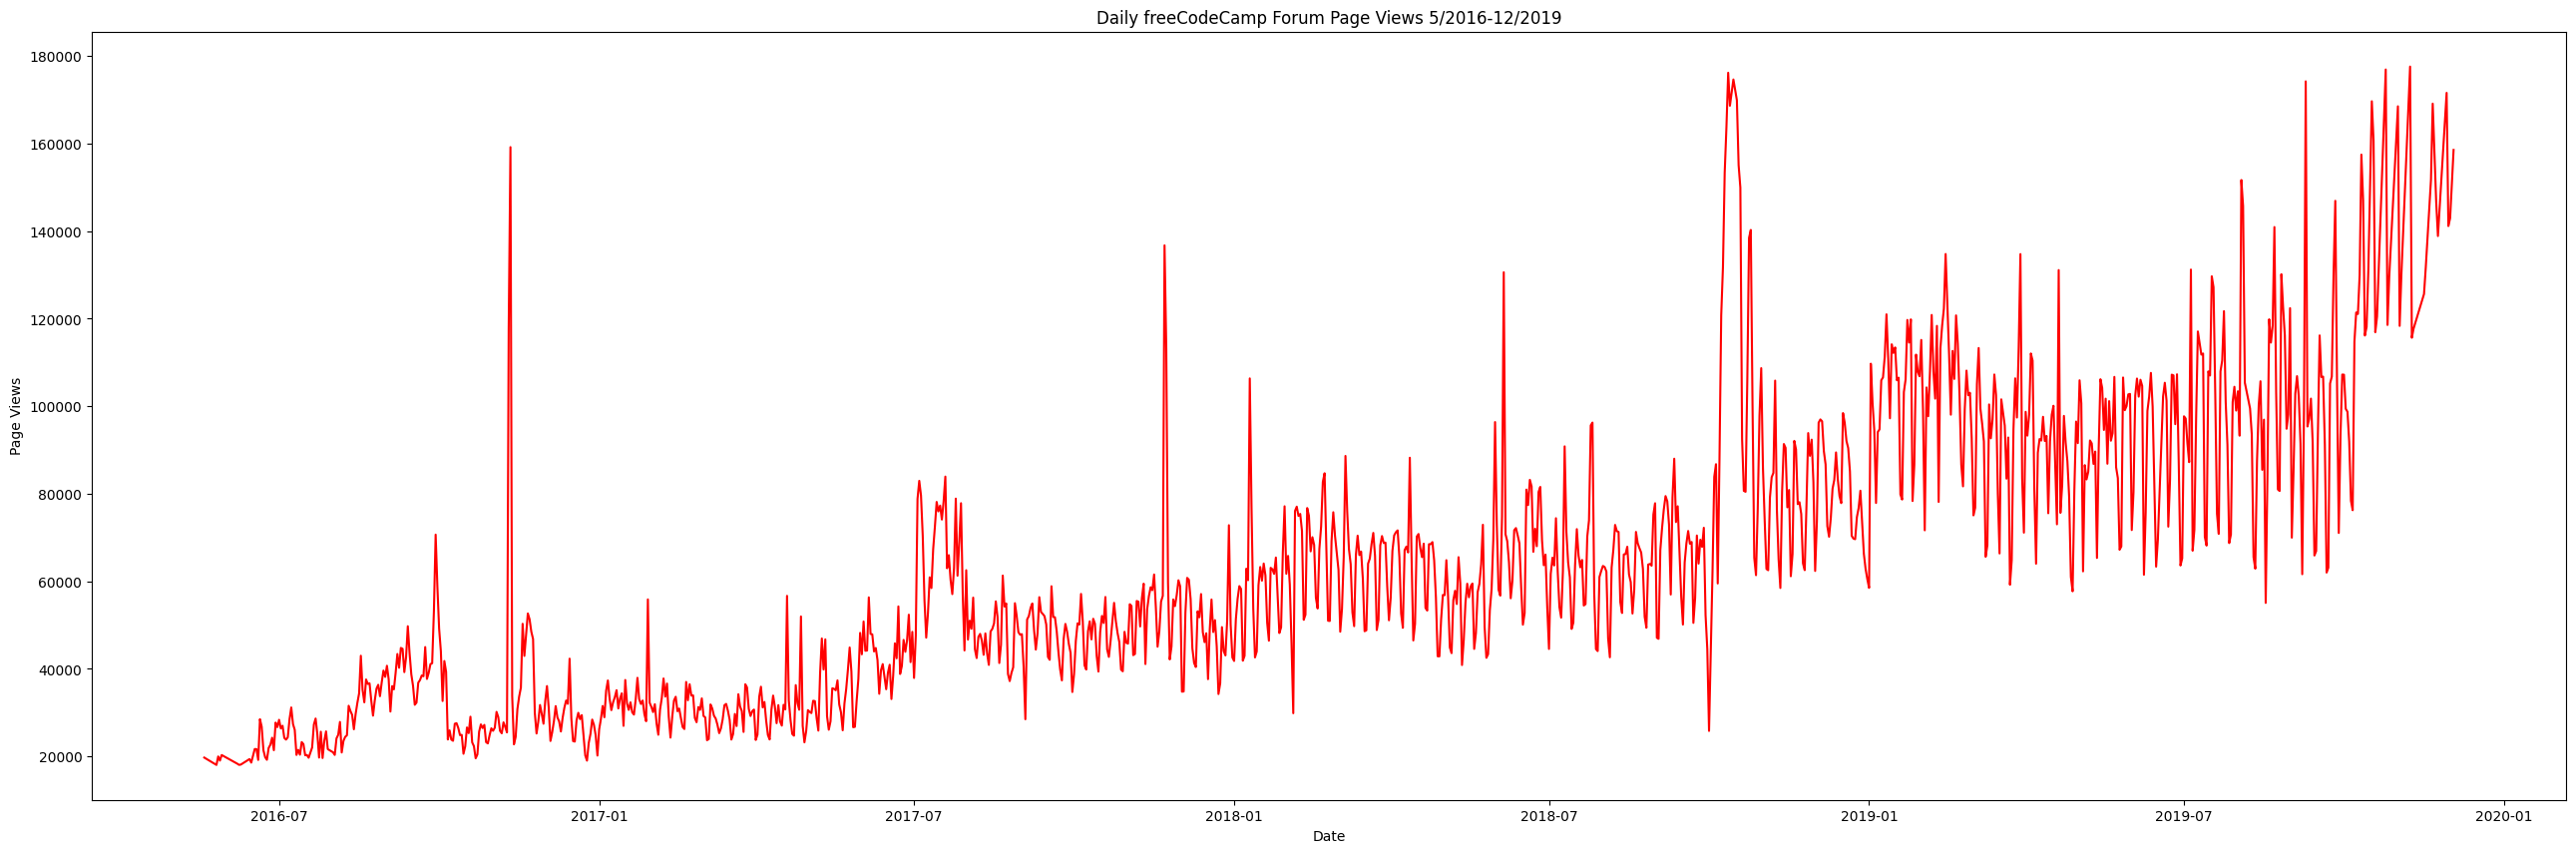

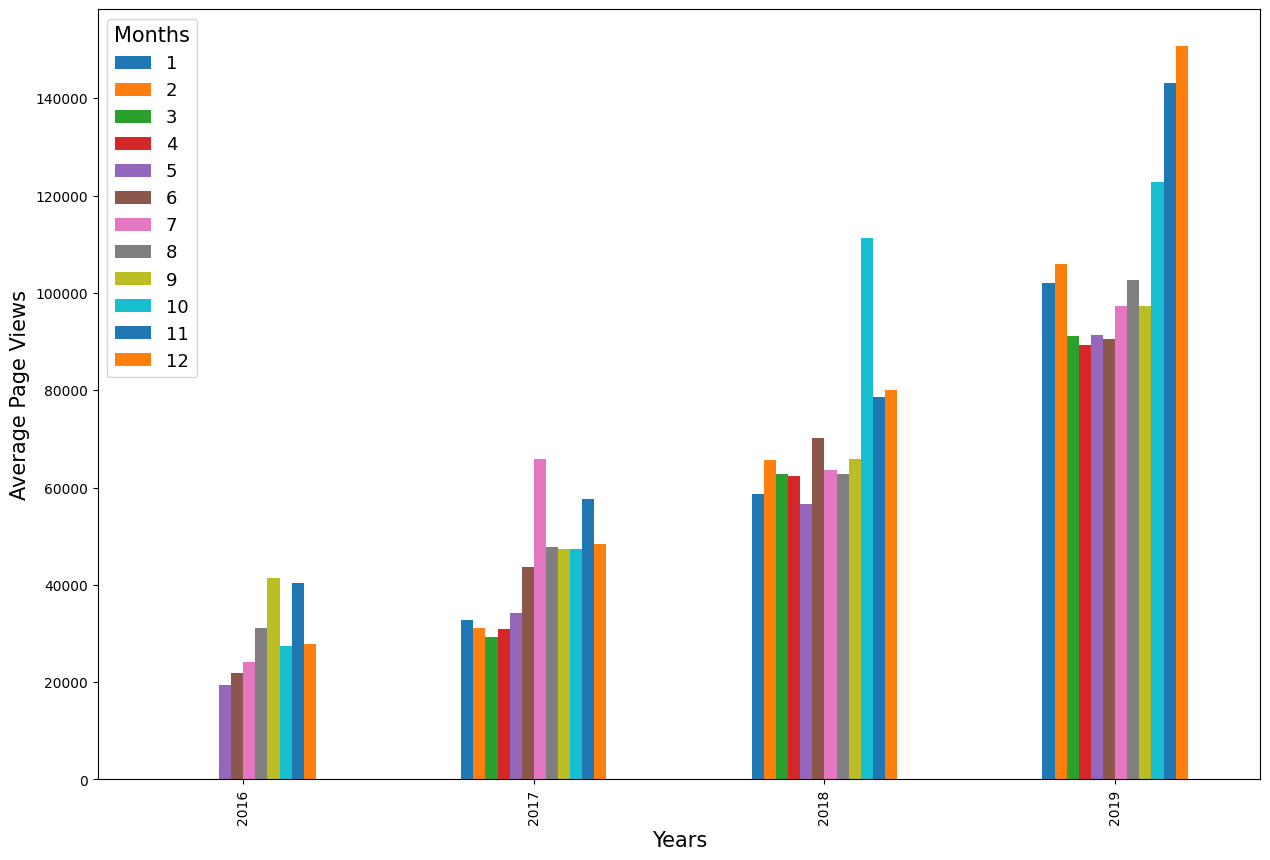

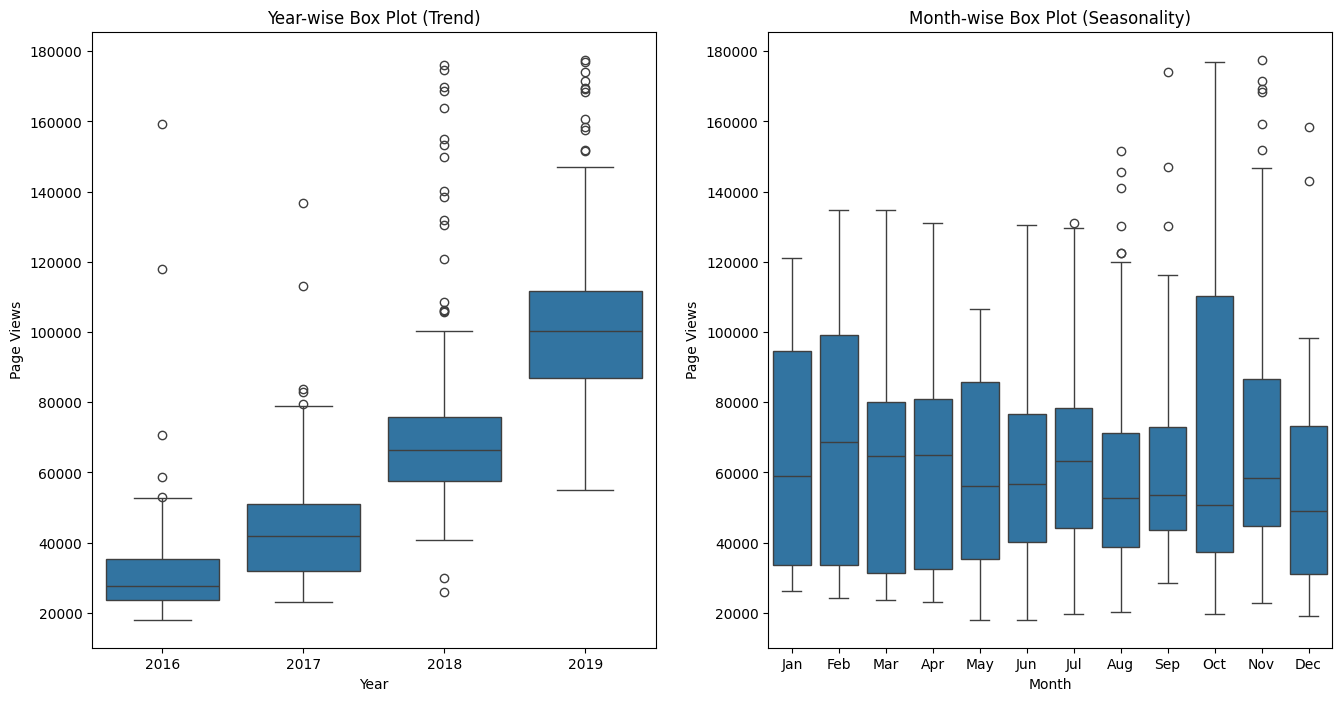

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Import data 
df = pd.read_csv("C:\\Users\\amirz\\OneDrive\\Desktop\\fcc-forum-pageviews.csv", index_col="date", parse_dates=True)

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False, palette=['r'])

    # Save image and return fig
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(15, 10))
    df_bar.plot(kind='bar', ax=ax)
    
    ax.set_xlabel('Years', fontsize=15)
    ax.set_ylabel('Average Page Views', fontsize=15)
    ax.legend(title='Months', fontsize=13, title_fontsize=15)
    
    # Save image and return fig
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Year-wise Box Plot
    sns.boxplot(data=df_box, ax=ax1, x="year", y="value")
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    # Month-wise Box Plot
    # months, in order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(data=df_box, ax=ax2, x="month", y="value", order=month_order)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

# Calling the functions to generate and save the plots
draw_line_plot()
draw_bar_plot()
draw_box_plot()
